In [1]:
%pylab inline
import pylab
from sklearn.datasets import fetch_mldata
DATA_PATH = '~/data'
mnist = fetch_mldata('MNIST original', data_home=DATA_PATH)

Populating the interactive namespace from numpy and matplotlib


In [2]:
mnist.data.shape

(70000, 784)

In [3]:

row = mnist.data[0,:] # First row of the array
col = mnist.data[:,0] # First column of the array

print row.shape
print col.shape

(784,)
(70000,)


In [4]:
type(mnist)

sklearn.datasets.base.Bunch

In [5]:
print row.sum(), row.max(), row.min()
print col.sum(), col.max(), col.min()

print mnist.data[:10,:] # First ten rows
print mnist.data[:,-10:] # Last ten columns

31095 255 0
0 0 0
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [6]:
train = mnist.data[:60000]
test = mnist.data[60000:]

In [7]:
test_sample = test[::100]
test_sample[:,299].mean()

88.819999999999993

In [8]:
img = mnist.data[0]
print img

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

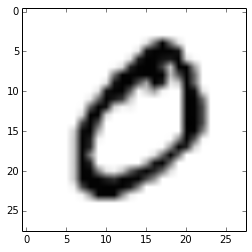

In [9]:
pylab.imshow(img.reshape(28, 28), cmap="Greys")

## DIY 1
Use imshow to visualize a number of images from sample. What can you say about how the data set is ordered?

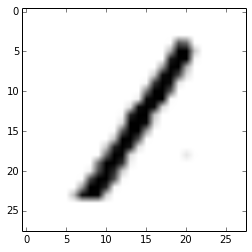

In [10]:
pylab.imshow(mnist.data[10000].reshape(28, 28), cmap="Greys")

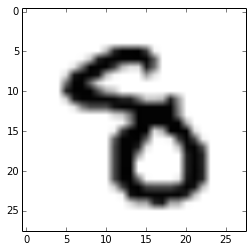

In [11]:
pylab.imshow(mnist.data[50000].reshape(28, 28), cmap="Greys")

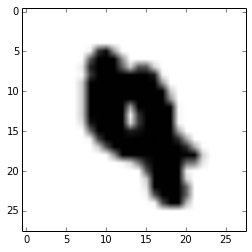

In [12]:
pylab.imshow(mnist.data[65000].reshape(28, 28), cmap="Greys")

## Inference:
     The MNIST data is ordered in ascending order from 0 to 9
     Also the number of images for are not consistent for all the numbers

In [13]:
%%time
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute').fit(train)

CPU times: user 16.2 ms, sys: 6.47 ms, total: 22.6 ms
Wall time: 195 ms


In [14]:
%%time
query_img = test[0]
_, result = model.kneighbors(query_img, n_neighbors=4)

CPU times: user 226 ms, sys: 146 ms, total: 372 ms
Wall time: 945 ms


In [15]:
print result

[[2857 5849 3393 3209]]


In [16]:
# Display several images in a row
def show(imgs, n=1):
    fig = pylab.figure()
    for i in xrange(0, n):
        fig.add_subplot(1, n, i+1, xticklabels=[], yticklabels=[])
        if n == 1:
            img = imgs
        else:
            img = imgs[i]
        pylab.imshow(img.reshape(28, 28), cmap="Greys")

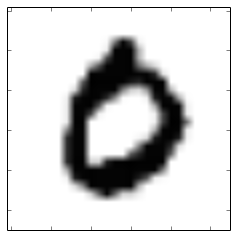

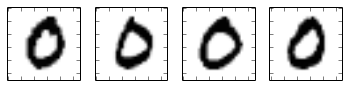

In [17]:
show(query_img)
show(train[result[0],:], len(result[0]))

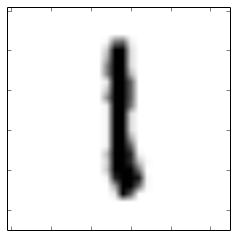

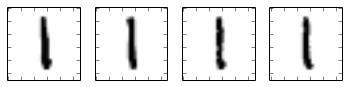

In [18]:
query_img = test[1000]
_, result = model.kneighbors(query_img, n_neighbors=4)
show(query_img)
show(train[result[0],:], len(result[0]))

## DIY 2
    Use the nearest neighbors model to inspect results for other images in the test set. Do all of the digits seem to perform as well as "0" does?

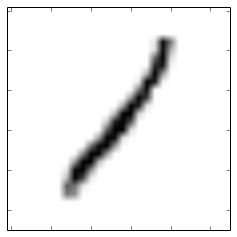

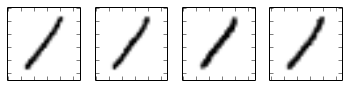

In [42]:
query_img = test[1801]
_, result = model.kneighbors(query_img, n_neighbors=4)
show(query_img)
show(train[result[0],:], len(result[0]))

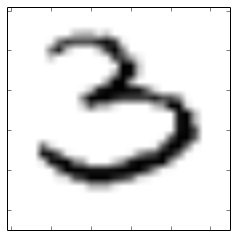

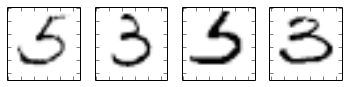

In [40]:
query_img = test[3390]
_, result = model.kneighbors(query_img, n_neighbors=4)
show(query_img)
show(train[result[0],:], len(result[0]))

## Digits 3 and 5 are not classified properly since there are 3s and 5sin the nearest neighbours result for digit 3 in test sample

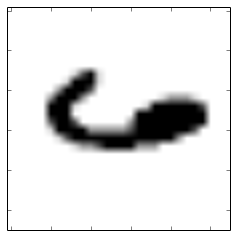

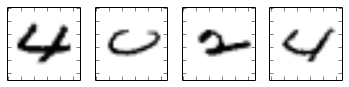

In [36]:
query_img = test[6360]
_, result = model.kneighbors(query_img, n_neighbors=4)
show(query_img)
show(train[result[0],:], len(result[0]))

## Digits 3 and 5 are not classified properly since there are 3s and 5sin the nearest neighbours result for digit 3 in test sample

In [63]:

train_labels = mnist.target[:60000]
test_labels = mnist.target[60000:]
test_labels_sample = test_labels[::100]

In [64]:
%%time
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='brute').fit(train, train_labels)

CPU times: user 5.99 ms, sys: 485 µs, total: 6.47 ms
Wall time: 13.5 ms


In [65]:
%%time
# Score the model!
model.score(test_sample, test_labels_sample)

CPU times: user 980 ms, sys: 70.6 ms, total: 1.05 s
Wall time: 1.48 s


0.96999999999999997

(100, 784)


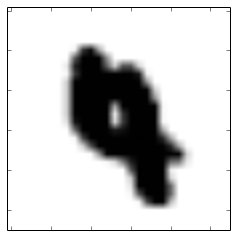

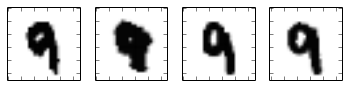

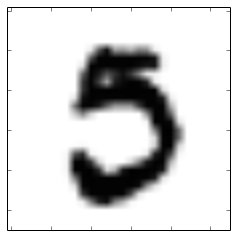

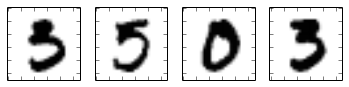

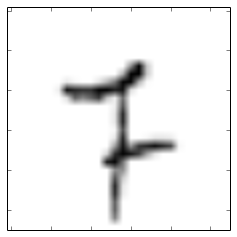

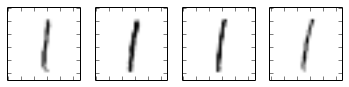

In [66]:
preds = model.predict(test_sample)
print test_sample.shape
errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_labels_sample[i]]

for i in errors:
    query_img = test_sample[i]
    _, result = model.kneighbors(query_img, n_neighbors=4)
    show(query_img)
    show(train[result[0],:], len(result[0]))

In [67]:
preds = model.predict(test_sample)
errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_labels_sample[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

0.03


## DIY 3

In [68]:
train = mnist.data[:60000]
train_labels = mnist.target[:60000]

test = mnist.data[60000:]
test_labels = mnist.target[60000:]

# For traning
train_sample = train[::100]
train_sample_labels = train_labels[::100]
# for testing
test_sample = test[::10]
test_sample_labels = test_labels[::10]

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Naive Bayes

In [70]:
nvg = GaussianNB()
nvg.fit(train_sample, train_sample_labels)

GaussianNB()

In [71]:
preds = nvg.predict(test_sample)
errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_sample_labels[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

0.398


## The error rate for Naive Bayes is 0.398

## Confusion matrix for Naive Bayes is as follows

In [72]:
conf_nvg = confusion_matrix(test_sample_labels, preds)
conf_nvg

array([[ 82,   0,   2,   4,   0,   2,   1,   0,   5,   2],
       [  0, 105,   0,   1,   0,   0,   3,   0,   5,   0],
       [  7,   1,  50,  17,   2,   2,   3,   1,  17,   3],
       [ 12,   0,   7,  55,   5,   2,   7,   2,   2,   9],
       [  4,   0,   5,   1,  55,   1,   4,   5,   1,  22],
       [  9,   0,   2,  14,  12,  29,   3,   0,  15,   6],
       [  2,   0,  10,   1,   4,   0,  76,   0,   2,   0],
       [  0,   0,   0,   1,   8,   3,   0,  25,   3,  63],
       [  2,   1,   1,   4,  18,   6,   3,   1,  41,  21],
       [  0,   1,   1,   0,   3,   2,   0,   7,   2,  84]])

In [74]:
x = 0
z = None
for i in range(0,10):
    for j in range(i+1, 10):
        if(i != j):
            y = {(i,j): conf_nvg[i][j]+conf_nvg[j][i] }
            if(x <= y.values()[0]):
                x = y.values()[0]
                z = y
print z    

{(7, 9): 70}


## The pairs of digits most frequently confused with each other are (7, 9) with a confusion frequency of 70

## SVM (linear kernel) 

In [75]:
svmlin = SVC(kernel='linear')
svmlin.fit(train_sample, train_sample_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [76]:
preds = svmlin.predict(test_sample)
errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_sample_labels[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

0.127


## The error rate for Naive Bayes is 0.127

## Confusion matrix for Naive Bayes is as follows

In [77]:
conf_svm = confusion_matrix(test_sample_labels, preds)
conf_svm

array([[ 95,   0,   0,   0,   0,   0,   3,   0,   0,   0],
       [  0, 112,   0,   0,   0,   1,   1,   0,   0,   0],
       [  2,   2,  88,   1,   1,   0,   2,   6,   1,   0],
       [  0,   1,   6,  80,   1,   4,   0,   3,   2,   4],
       [  0,   2,   0,   0,  88,   0,   4,   0,   0,   4],
       [  0,   1,   1,   4,   1,  77,   3,   0,   3,   0],
       [  1,   0,   1,   0,   5,   2,  86,   0,   0,   0],
       [  0,   1,   6,   0,   1,   0,   0,  91,   0,   4],
       [  2,   1,   1,   3,   4,   5,   2,   1,  79,   0],
       [  2,   1,   0,   4,  10,   0,   1,   4,   1,  77]])

In [78]:
x = 0
z = None
for i in range(0,10):
    for j in range(i+1, 10):
        if(i != j):
            y = {(i,j): conf_svm[i][j]+conf_svm[j][i] }
            if(x <= y.values()[0]):
                x = y.values()[0]
                z = y

print z    

{(4, 9): 14}


## The pairs of digits most frequently confused with each other are (4, 9) with a confusion frequency of 14

## Logistic Regression classification

In [79]:
lr = LogisticRegression()
lr.fit(train_sample, train_sample_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [80]:
preds = lr.predict(test_sample)
errors = [i for i in xrange(0, len(test_sample)) if preds[i] != test_sample_labels[i]]
err_rate = float(len(errors))/len(preds)
print err_rate

0.178


## The error rate for Naive Bayes is 0.178

## Confusion matrix for Naive Bayes is as follows

In [81]:
conf_lr = confusion_matrix(test_sample_labels, preds)
conf_lr

array([[ 94,   0,   0,   0,   0,   0,   2,   1,   1,   0],
       [  0, 111,   0,   1,   0,   0,   1,   0,   1,   0],
       [  2,   3,  83,   5,   1,   0,   1,   1,   5,   2],
       [  1,   0,   6,  74,   1,   3,   1,   4,   6,   5],
       [  0,   0,   0,   0,  80,   0,   4,   1,   5,   8],
       [  4,   0,   1,   1,   1,  65,   4,   2,   9,   3],
       [  1,   1,   0,   0,   3,   1,  87,   0,   2,   0],
       [  0,   1,   3,   1,   2,   0,   0,  89,   2,   5],
       [  2,   2,   1,   3,   3,   5,   5,   3,  69,   5],
       [  3,   1,   2,   3,   7,   1,   1,   5,   7,  70]])

In [82]:
x = 0
z = None
for i in range(0,10):
    for j in range(i+1, 10):
        if(i != j):
            y = {(i,j): conf_lr[i][j]+conf_lr[j][i] }
            if(x <= y.values()[0]):
                x = y.values()[0]
                z = y
print z                

{(4, 9): 15}


## The pairs of digits most frequently confused with each other are (4, 9) with a confusion frequency of 15